# Centrality measures

In this class we will start analysing the centrality measures

In [19]:
# as usual we need to import the key libraries we need to store, analyse and plot the network
import networkx as nx
#import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
# let's also get a network from the folder "data"
a=open("data/net1_edge_list.txt","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['1', '2']
['2', '3']
['3', '1']
['2', '4']
['1', '4']
['1', '5']
['2', '5']
['3', '5']
['5', '6']
['6', '7']
['6', '8']
['6', '9']
['7', '8']
['7', '9']
['9', '10']
['6', '11']
['11', '12']
['11', '13']
['11', '14']
['12', '15']
['13', '14']
['12', '13']


In [21]:
# the data comes as unweighted list of edges
# let's store the network
G=nx.Graph()
a=open("data/net1_edge_list.txt","r")
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close()

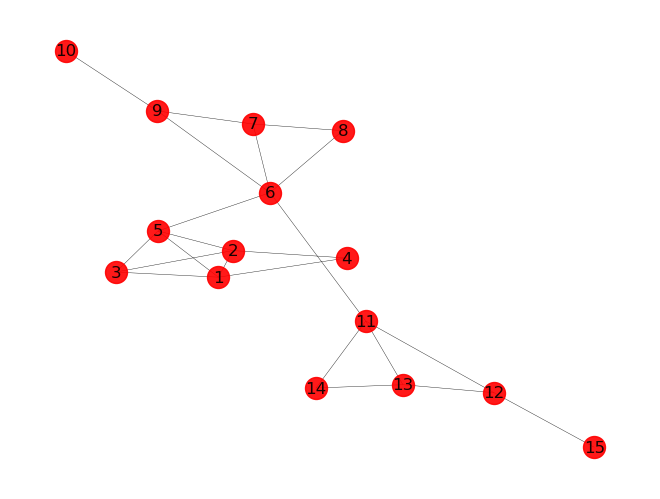

In [22]:
# let's plot the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",with_labels=True,font_size=12)

## Degree centrality

In [23]:
# the degree is simply the number of connections of each node

# let's compute the degree for each node

for i in G.nodes():
    print (i,G.degree(i))  # this is the function to compute the degree of each node directly!

1 4
2 4
3 3
4 2
5 4
6 5
7 3
8 2
9 3
10 1
11 4
12 3
13 3
14 2
15 1


In [24]:
# how do we get the list of degree for each node ordered from the highest to the lowest?

degree=[]  # list of degree
for i in G.nodes():
        degree.append([G.degree(i),i])   # we put in the list a list of two values, the degree and id of each node
        
        
degree=sorted(degree,reverse=True) # we sort the list using the first element of each list (the degree)

In [25]:
# let's print the top 10
for i in range(10):
    print ("Rank = ",i+1,"Degree = ", degree[i][0], "Node id = ",degree[i][1])

Rank =  1 Degree =  5 Node id =  6
Rank =  2 Degree =  4 Node id =  5
Rank =  3 Degree =  4 Node id =  2
Rank =  4 Degree =  4 Node id =  11
Rank =  5 Degree =  4 Node id =  1
Rank =  6 Degree =  3 Node id =  9
Rank =  7 Degree =  3 Node id =  7
Rank =  8 Degree =  3 Node id =  3
Rank =  9 Degree =  3 Node id =  13
Rank =  10 Degree =  3 Node id =  12


In [26]:
# what do we learn from this? 
# can we speculate something about the role of each node in the network?

In [27]:
# Lets format and save the table nicely for import into Excel

a=open('data/Degree Centrality.csv','w')

# print header row
header = "Rank,Degree,Node id"+"\n"
a.write(header)

# for each entry in the degree list
for i in range(len(degree)):
    row = str(i+1)+","+str(degree[i][0])+","+str(degree[i][1])+"\n"
    a.write(row)
a.close()

# Open data/Degree Centrality.csv in Excel

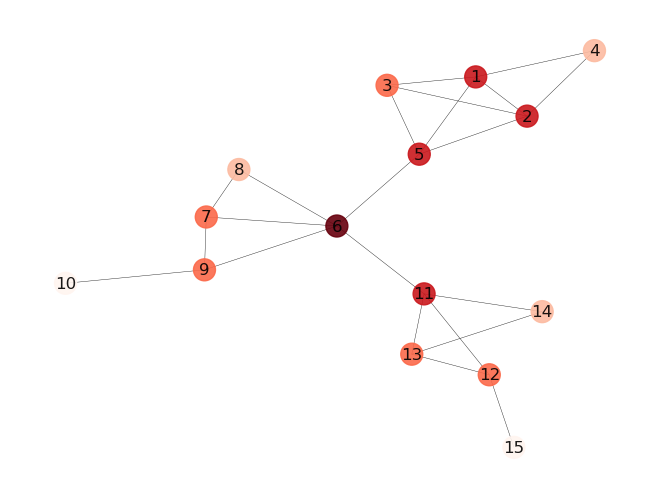

In [28]:
# we can also use the degree as attribute in the plot of the graph

color_code=[]  # this is the list
for i in G.nodes():
    color_code.append(G.degree(i))  # each element in the list is the degree of each node

# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,with_labels=True,font_size=12)

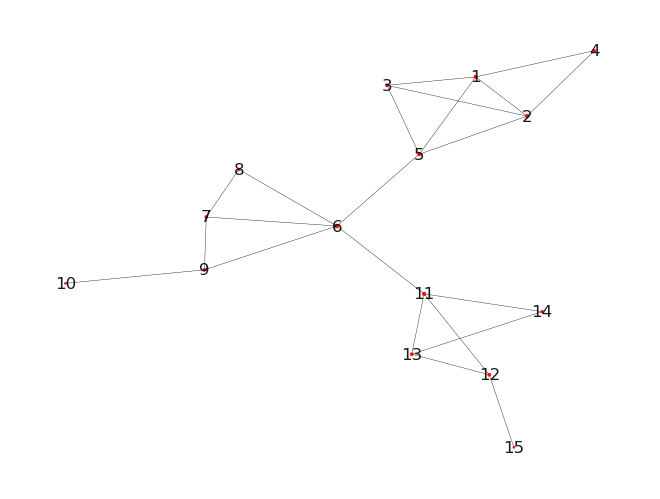

In [29]:
# or the size of each node proportional to the degree

node_size=[]  # this is the list
for i in G.nodes():
    node_size.append(G.degree(i))  # each element in the list is the degree of each node

# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=node_size,width=0.3,edge_color="Black",cmap='Reds',
        node_color='Red',with_labels=True,font_size=12)

## You may get a warning the first time you run this; it is just information. Run it again to remove the message.

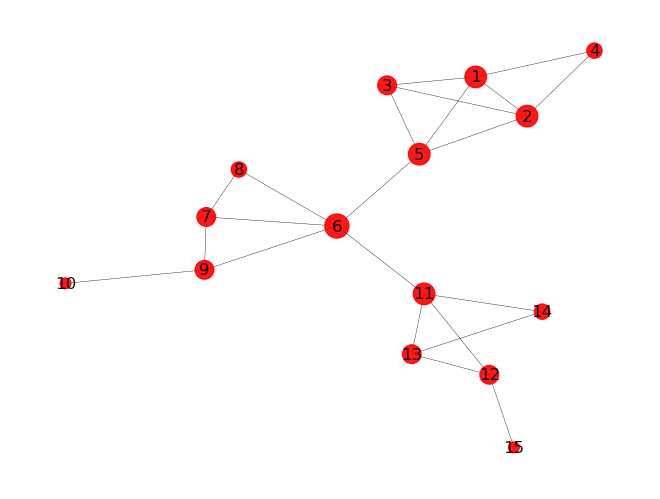

In [30]:
# looks too small!
# we can increase the size with a multiplicative factor

node_size=[]  # this is the list
for i in G.nodes():
    node_size.append(60*G.degree(i))  # each element in the list is the degree of each node



# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=node_size,width=0.3,edge_color="Black",cmap='Reds',
        node_color='Red',with_labels=True,font_size=12)

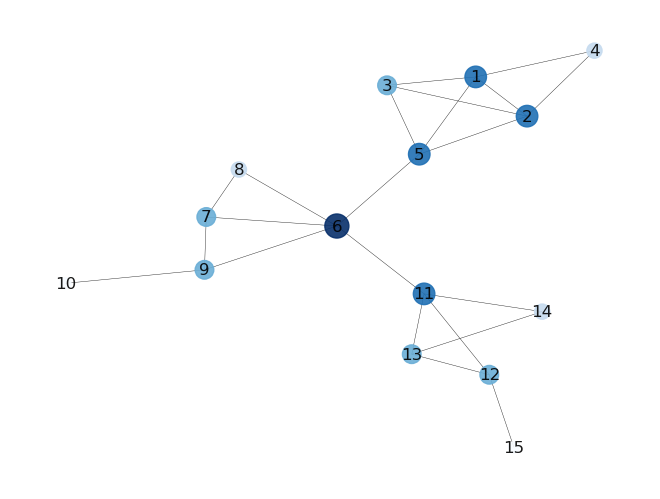

In [31]:
# we can also use the colors!

node_size=[]  # this is the list
for i in G.nodes():
    node_size.append(60*G.degree(i))  # each element in the list is the degree of each node



# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=node_size,width=0.3,edge_color="Black",cmap='Blues',
        node_color=color_code,with_labels=True,font_size=12)

## Closeness centrality

$$ C_i=\frac{N-1}{\sum_{j}d_{ij}} $$

In [32]:
# let's read and store the network data
G=nx.Graph()
a=open("data/net1_edge_list.txt","r")
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
a.close() 

In [33]:
# we can compute the closeness quite easily
l=nx.closeness_centrality(G)

# let's create a list with the closeness values and see which nodes are at the top
closeness=[]
for i in G.nodes():
    closeness.append([l[i],i])
closeness=sorted(closeness,reverse=True)

In [34]:
# let's see the top 10
for i in range(10):
    print ("Rank = ",i+1,"Closeness = ", closeness[i][0], "Node id = ",closeness[i][1])

Rank =  1 Closeness =  0.56 Node id =  6
Rank =  2 Closeness =  0.4666666666666667 Node id =  5
Rank =  3 Closeness =  0.4666666666666667 Node id =  11
Rank =  4 Closeness =  0.4 Node id =  9
Rank =  5 Closeness =  0.4 Node id =  7
Rank =  6 Closeness =  0.3783783783783784 Node id =  8
Rank =  7 Closeness =  0.358974358974359 Node id =  2
Rank =  8 Closeness =  0.358974358974359 Node id =  1
Rank =  9 Closeness =  0.35 Node id =  3
Rank =  10 Closeness =  0.35 Node id =  13


In [35]:
# some numbers are written differently
# how can we deal with the various formats?
# let's get a number
r=0.000438342342

# we can easily control how many digits we want to use
print ("{:.5f}".format(r))  # we can decide how many digits to show!

0.00044


In [36]:
# so we can change the code accordingly
for i in range(10):
    print ("Rank = ",i+1,"Closeness = ", "{:.2f}".format(closeness[i][0]), "Node id = ",closeness[i][1])

Rank =  1 Closeness =  0.56 Node id =  6
Rank =  2 Closeness =  0.47 Node id =  5
Rank =  3 Closeness =  0.47 Node id =  11
Rank =  4 Closeness =  0.40 Node id =  9
Rank =  5 Closeness =  0.40 Node id =  7
Rank =  6 Closeness =  0.38 Node id =  8
Rank =  7 Closeness =  0.36 Node id =  2
Rank =  8 Closeness =  0.36 Node id =  1
Rank =  9 Closeness =  0.35 Node id =  3
Rank =  10 Closeness =  0.35 Node id =  13


In [37]:
# Lets format and save the table nicely for import into Excel

a=open('data/Closeness Centrality.csv','w')

# print header row
header = "Rank,Closeness,Node id"+"\n"  # '\n' is new line
a.write(header)

# for each entry in the closeness list
for i in range(len(closeness)):
    row = str(i+1)+","+str("{:.2f}".format(closeness[i][0]))+","+str(closeness[i][1])+"\n"
    a.write(row)
a.close()

# Open data/Closeness Centrality.csv in Excel

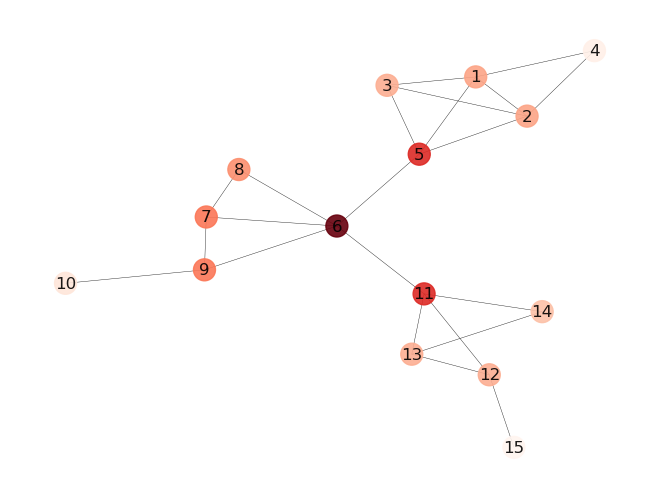

In [38]:
# let's plot the network considering closeness as attribute

l=nx.closeness_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node

# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,with_labels=True,font_size=12)

In [39]:
# what do we learn?

## Betweenness centrality

In [40]:
# let's consider the same network as we have done so far
# the betweenness can be computed directly

l=nx.betweenness_centrality(G) # this is the function

# let's create the list of [betweeneess,node id] to see the most central nodes

betweenness=[]
for i in G.nodes():
    betweenness.append([l[i],i])
    
betweenness=sorted(betweenness,reverse=True)

In [41]:
# let's see the top 10
for i in range(10):
    print ("Rank = ",i+1,"Betweenness = ", betweenness[i][0], "Node id = ",betweenness[i][1])

Rank =  1 Betweenness =  0.7252747252747254 Node id =  6
Rank =  2 Betweenness =  0.45054945054945056 Node id =  11
Rank =  3 Betweenness =  0.4395604395604396 Node id =  5
Rank =  4 Betweenness =  0.14285714285714288 Node id =  9
Rank =  5 Betweenness =  0.14285714285714288 Node id =  12
Rank =  6 Betweenness =  0.06593406593406594 Node id =  2
Rank =  7 Betweenness =  0.06593406593406594 Node id =  1
Rank =  8 Betweenness =  0.01098901098901099 Node id =  7
Rank =  9 Betweenness =  0.01098901098901099 Node id =  13
Rank =  10 Betweenness =  0.0 Node id =  8


In [ ]:
# as done before let's cut the number of digits

for i in range(10):
    print ("Rank = ",i+1,"Betweenness = ", "{:.2f}".format(betweenness[i][0]), "Node id = ",betweenness[i][1])

In [ ]:
# what do we learn? 
# observe the value of node 8
# why zero??!!

In [ ]:
# several other nodes have value zero!
for i in range(15):
    print ("Rank = ",i+1,"Betweenness = ", "{:.2f}".format(betweenness[i][0]), "Node id = ",betweenness[i][1])

In [ ]:
# Lets format and save the table nicely for import into Excel

a=open('data/Betweenness Centrality.csv','w')

# print header row
header = "Rank,Betweenness,Node id"+"\n"  # '\n' is new line
a.write(header)

# for each entry in the betweenness list
for i in range(len(betweenness)):
    row = str(i+1)+","+str("{:.2f}".format(betweenness[i][0]))+","+str(betweenness[i][1])+"\n"
    a.write(row)
a.close()

# Open data/Betweenness Centrality.csv in Excel

In [ ]:
# let's plot the network using the betweenness as attribute

l=nx.betweenness_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the betweenness of each node


# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,with_labels=True,font_size=12)

In [ ]:
# what do we learn?!

## Eigenvector centrality

The basic idea: the important of a node is given by the importance of the node that connects to it

In [ ]:
# as for the others, we can just call the function

l=nx.eigenvector_centrality(G)

# let's compute the list of top nodes of this quantity
eigenv_centrality=[]
for i in G.nodes():
        eigenv_centrality.append([l[i],i])
eigenv_centrality=sorted(eigenv_centrality,reverse=True)

In [ ]:
# let's see the top 10
for i in range(10):
    print ("Rank = ",i+1,"Eigenvector Cent. = ", "{:.2f}".format(eigenv_centrality[i][0]), "Node id = ",eigenv_centrality[i][1])

In [ ]:
# What did we learn?

In [ ]:
# Lets format and save the table nicely for import into Excel

a=open('data/Eigenvector Centrality.csv','w')

# print header row
header = "Rank,Eigenvector,Node id"+"\n"  # '\n' is new line
a.write(header)

# for each entry in the eigenv_centrality list
for i in range(len(eigenv_centrality)):
    row = str(i+1)+","+str("{:.2f}".format(eigenv_centrality[i][0]))+","+str(eigenv_centrality[i][1])+"\n"
    a.write(row)
a.close()

# Open data/Eigenvector Centrality.csv in Excel

In [ ]:
# let's plot the values as network's attributes

l=nx.eigenvector_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node



# let's plot it

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,with_labels=True,font_size=12)

In [ ]:
# what do we learn?